# Train NN model on the FashionMNIST data

https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

You may refer to this tutorial about the original Mnist:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

Or any other tutorial you may find online:
https://www.kaggle.com/zalando-research/fashionmnist/code

In [70]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

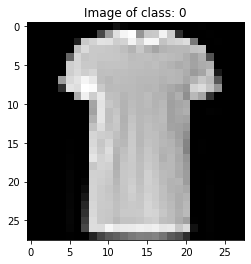

In [72]:
# Lest read a random image from the dataset and draw it
image, label = training_data[17]
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {label}")
plt.show()

In [73]:
# Lets check image shape
image.shape

torch.Size([1, 28, 28])

In [74]:
# Lets see all the classes available
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Task 1:

Create a DataLoader objects for train and test

In [75]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=32, shuffle= True )
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle= True )


# Task 2:

Create a Neural Network

In [77]:
input_size = 784 
hidden_size = [128, 32] 
output_size = 10 
model = nn.Sequential(nn.Linear(input_size, hidden_size[0]), 
                      nn.ReLU(), 
                      nn.Linear(hidden_size[0], hidden_size[1] ),
                      nn.ReLU(), 
                      nn.Linear(hidden_size[1], output_size), 
                      nn.LogSoftmax(dim=1)) 


# Task 3:

Specify loss and optimizer

In [78]:
loss_criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

# Task 3:

Train model using for loop

In [79]:
device = torch.device('cpu')
EPOCHS  = 20
for epoch in range(EPOCHS):
    run_loss = 0
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
       
        pred = model(X.view(X.shape[0], -1))
        loss = loss_criterion(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        run_loss += loss.item()
    print(f"Epoch {epoch + 1}\n Training loss: {run_loss/len(train_loader)}") 

Epoch 1
 Training loss: 0.7952102719545364
Epoch 2
 Training loss: 0.47889505796432497
Epoch 3
 Training loss: 0.4201703635573387
Epoch 4
 Training loss: 0.38670456885496773
Epoch 5
 Training loss: 0.36308225065867106
Epoch 6
 Training loss: 0.3456089167912801
Epoch 7
 Training loss: 0.33081396451393763
Epoch 8
 Training loss: 0.31870436617136
Epoch 9
 Training loss: 0.30722771431207657
Epoch 10
 Training loss: 0.29642427366574603
Epoch 11
 Training loss: 0.28761260614991185
Epoch 12
 Training loss: 0.28136290806333225
Epoch 13
 Training loss: 0.2713015504221121
Epoch 14
 Training loss: 0.26481320516467094
Epoch 15
 Training loss: 0.25943031289776164
Epoch 16
 Training loss: 0.2537860222220421
Epoch 17
 Training loss: 0.24878144743641217
Epoch 18
 Training loss: 0.2416823262691498
Epoch 19
 Training loss: 0.23652874922156333
Epoch 20
 Training loss: 0.23408244201044243


# Task 4:

Report accuracy from train set, and test set independently

In [80]:
def accuracy(loader, mod):
  correct_count, all_count = 0, 0
  preds = torch.tensor([])
  true_vals = torch.tensor([])
  for x, y in loader:
    true_vals = torch.cat((true_vals, y), 0)
    for i in range(len(y)):
      img = x[i].view(1, 784)
      with torch.no_grad():
          logps = mod(img)
      ps = torch.exp(logps)
      _, pred_label = torch.max(ps, dim = 1)
      preds = torch.cat((preds, pred_label), 0)
      true_label = y[i]
      if(true_label == pred_label.item()):
        correct_count += 1
      all_count += 1

  return all_count, correct_count/all_count, preds, true_vals

train_count, acc_train, train_preds, train_true_val = accuracy(train_loader, model)
print(f"Number Of Images Train: {train_count}, \n Accuracy(train dataset): {acc_train} \n")
test_count, acc_test, test_preds, test_true_val = accuracy(test_loader, model)
print(f"Number Of Images Test: {test_count}, \n Accuracy(test dataset): {acc_test}\n")

Number Of Images Train: 60000, 
 Accuracy(train dataset): 0.9193166666666667 

Number Of Images Test: 10000, 
 Accuracy(test dataset): 0.8825



# Task 5:

Report confussion matrix for the test set

Expected format:
```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
```

In [81]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_true_val, test_preds)
print(f'Confussion matrix: \n {conf_matrix}')

Confussion matrix: 
 [[834   4  24  32   7   2  86   0  11   0]
 [  0 976   1  17   4   0   2   0   0   0]
 [ 20   2 799  17 110   2  49   0   1   0]
 [ 19  15  11 883  51   0  17   0   4   0]
 [  0   1  77  19 860   0  42   0   1   0]
 [  0   0   0   1   0 943   0  40   2  14]
 [125   6  95  41  80   0 642   0  11   0]
 [  0   0   0   0   0   7   0 956   0  37]
 [  4   1   6   5   5   2   3   5 969   0]
 [  0   0   0   0   0   5   1  31   0 963]]


# Task 6 (optional):

Train LogisticRegression and DecisionTree models on the same data
Compare their performance to the NN

In [97]:
class Logistic_Regression(torch.nn.Module):
 def __init__(self):
   super(Logistic_Regression,self).__init__()
   self.layer1 = torch.nn.Linear(784, 128)
   self.layer2 = torch.nn.Linear(128, 64)
   self.layer3 = torch.nn.Linear(64, 10)
 def forward(self,x):
   y_predict = self.layer1(x)
   y_predict = torch.sigmoid(self.layer2(y_predict))
   y_predict = torch.sigmoid(self.layer3(y_predict))
   return y_predict

logistic_regression = Logistic_Regression()

EPOCHS  = 15
for epoch in range(EPOCHS):

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        pred = logistic_regression.forward(X.view(X.shape[0], -1))
        loss = loss_criterion(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}\n")

Epoch 1

Epoch 2

Epoch 3

Epoch 4

Epoch 5

Epoch 6

Epoch 7

Epoch 8

Epoch 9

Epoch 10

Epoch 11

Epoch 12

Epoch 13

Epoch 14

Epoch 15



In [98]:
train_count_lr, acc_train_lr, _, _ = accuracy(train_loader, logistic_regression.forward)
print(f"Number Of Images Train: {train_count_lr}, \n Accuracy LogisticRegression (train dataset): {acc_train_lr} \n")
test_count_lr, acc_test_lr, _, _ = accuracy(test_loader, logistic_regression.forward)
print(f"Number Of Images Test: {test_count_lr}, \n Accuracy LogisticRegression (test dataset): {acc_test_lr}\n")

Number Of Images Train: 60000, 
 Accuracy LogisticRegression (train dataset): 0.11681666666666667 

Number Of Images Test: 10000, 
 Accuracy LogisticRegression (test dataset): 0.1143



In [99]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()

train_dataset = training_data.data.reshape(-1, 28*28).numpy()
train_label = training_data.targets.numpy()

test_dataset = test_data.data.reshape(-1, 28*28).numpy()
test_label = test_data.targets.numpy()

decision_tree_model.fit(train_dataset, train_label)

pred = decision_tree_model.predict(test_dataset)


print(f"Accuracy DecisionTree (test dataset): {(pred==test_label).sum()/len(test_label)}\n")


Accuracy DecisionTree (test dataset): 0.7891

